<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/project_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Group By
This notebook demonstrates the following features of Pandas:
- Read selected columns (*usecols*)
- Identify missing values (*isnull*)
- Drop rows with missing values (*dropna*)
- Summarize numeric columns by groups (*grouopby*) 
- Sort by column values (*sort_values*)
- Pandas visualization (*bar chart, scatter plot*)
- Pandas visualization backend (*plotly, matplotlib, etc.*)

## Step 1 - Install and Import Libraries

### 1.1 - Install Plotly 
Plotly is an interactive visualization library and can be utilized as the backend
for Pandas. Pandas support multiple visualization backends. For example, matplotlib,
seaborn, plotly, bokeh are all supported.

In [19]:
!pip install plotly
!pip install "notebook>=5.3" "ipywidgets>=7.2"

### 1.2 - Import pandas

In [2]:
import pandas as pd

print(f"pd.__version__ = {pd.__version__}")

pd.__version__ = 1.1.2


## Step 2. Read Data 
We will read data directly from the web link. Since the dataset has almost 
2000 columns, we only read a selected list of columns of interest.

In [3]:
DATA_URL = "https://data.ed.gov/dataset/9dc70e6b-8426-4d71-b9d5-70ce6094a3f4/resource/823ac095-bdfc-41b0-b508-4e8fc3110082/download/most-recent-cohorts-all-data-elements-1.csv"
COLUMN_LIST = ['UNITID','INSTNM', 'CONTROL','CITY', 'STABBR','ST_FIPS', 'ZIP', 'TUITIONFEE_IN','ADM_RATE','MD_EARN_WNE_P10']

df = pd.read_csv(DATA_URL, usecols=COLUMN_LIST)
df.shape

(6806, 10)

In [4]:
df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,CONTROL,ST_FIPS,ADM_RATE,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,0.8986,9744.0,31000
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,0.9211,8568.0,41200
2,100690,Amridge University,Montgomery,AL,36117-3553,2,1,NaN,6900.0,39600
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,0.8087,10714.0,46700
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,0.9774,11068.0,27700


## Step 3 - Cleanse Data 
The data has missing values and other quality issues and requires cleansing.

### 3.1 - Handle Missing Values
For simplicity, we simply drop all rows that contain missing values.

In [5]:
df[df.notnull()]

,UNITID,INSTNM,CITY,STABBR,ZIP,CONTROL,ST_FIPS,ADM_RATE,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,0.8986,9744.0,31000
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,0.9211,8568.0,41200
2,100690,Amridge University,Montgomery,AL,36117-3553,2,1,NaN,6900.0,39600
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,0.8087,10714.0,46700
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,0.9774,11068.0,27700
...,...,...,...,...,...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,Dublin,GA,310215149,1,13,NaN,6120.0,NaN
6802,48511113,Georgia Military College - Eastman,Eastman,GA,310236109,1,13,NaN,6120.0,NaN
6803,48616901,American College of Barbering - Florence,Florence,KY,410421801,3,21,NaN,NaN,NaN
6804,49005401,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,3,12,NaN,21420.0,NaN


In [6]:
df.isnull().sum()

UNITID                0
INSTNM                0
CITY                  0
STABBR                0
ZIP                   0
CONTROL               0
ST_FIPS               0
ADM_RATE           4800
TUITIONFEE_IN      2941
MD_EARN_WNE_P10    1303
dtype: int64

In [7]:
df2 = df.dropna()
df2.shape

(1763, 10)

### 3.2 - Cleanse Median Earnings Column

In [8]:
# Find out how many colleges have "PrivacySuppressed" in median earnings

df2[df2["MD_EARN_WNE_P10"] == "PrivacySuppressed"]


,UNITID,INSTNM,CITY,STABBR,ZIP,CONTROL,ST_FIPS,ADM_RATE,TUITIONFEE_IN,MD_EARN_WNE_P10
231,110918,California Christian College,Fresno,CA,93727,2,6,1.0000,9570.0,PrivacySuppressed
328,116846,American Jewish University,Los Angeles,CA,90077-1519,2,6,0.9600,31946.0,PrivacySuppressed
454,123280,Shasta Bible College and Graduate School,Redding,CA,96002,2,6,1.0000,12060.0,PrivacySuppressed
501,126076,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,Los Angeles,CA,90046-7660,2,6,0.7113,14700.0,PrivacySuppressed
559,128586,Bais Binyomin Academy,Monsey,NY,10952,2,36,0.8182,8450.0,PrivacySuppressed
...,...,...,...,...,...,...,...,...,...,...
5069,451398,Yeshiva Toras Chaim,Lakewood,NJ,08701,2,34,0.6237,12250.0,PrivacySuppressed
5070,451404,Talmudical Seminary of Bobov,Brooklyn,NY,11219,2,36,0.9545,10200.0,PrivacySuppressed
5112,454184,The King's College,New York,NY,10004,2,36,0.5382,36450.0,PrivacySuppressed
5170,455257,Yeshiva of Machzikai Hadas,Brooklyn,NY,11219-1408,2,36,0.9529,9200.0,PrivacySuppressed


In [9]:
# Remove these colleges

df2 = df2[df2["MD_EARN_WNE_P10"] != "PrivacySuppressed"]
df2.shape

(1666, 10)

In [10]:
# Change median earnings column type from string to integer

df2["MD_EARN_WNE_P10"] = df2["MD_EARN_WNE_P10"].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 5931
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           1666 non-null   int64  
 1   INSTNM           1666 non-null   object 
 2   CITY             1666 non-null   object 
 3   STABBR           1666 non-null   object 
 4   ZIP              1666 non-null   object 
 5   CONTROL          1666 non-null   int64  
 6   ST_FIPS          1666 non-null   int64  
 7   ADM_RATE         1666 non-null   float64
 8   TUITIONFEE_IN    1666 non-null   float64
 9   MD_EARN_WNE_P10  1666 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 143.2+ KB


In [11]:
# Replace the Control Code with label for easier understanding 

control_dict = {
    1:"Public",            
    2:"Private, Nonprofit",
    3:"Proprietary"
}
       
df2.replace({"CONTROL": control_dict}, inplace=True)
df2.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,CONTROL,ST_FIPS,ADM_RATE,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,Public,1,0.8986,9744.0,31000
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Public,1,0.9211,8568.0,41200
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,Public,1,0.8087,10714.0,46700
4,100724,Alabama State University,Montgomery,AL,36104-0271,Public,1,0.9774,11068.0,27700
5,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,Public,1,0.5906,10780.0,44500


## Step 4 - Aggregate Data (by State)

In [12]:
# Aggregate using mean function

gb = df2[["STABBR","TUITIONFEE_IN","MD_EARN_WNE_P10"]].groupby('STABBR').mean()
gb.head()

,TUITIONFEE_IN,MD_EARN_WNE_P10
STABBR,,
AK,10772.250000,40075.000000
AL,15422.640000,37816.000000
AR,16004.611111,37011.111111
AZ,17156.214286,47078.571429
CA,29191.584158,50500.990099


In [13]:
# Reset index so that State becomes a column

gb = gb.reset_index()
gb.head()

,STABBR,TUITIONFEE_IN,MD_EARN_WNE_P10
0,AK,10772.250000,40075.000000
1,AL,15422.640000,37816.000000
2,AR,16004.611111,37011.111111
3,AZ,17156.214286,47078.571429
4,CA,29191.584158,50500.990099


## Step 5 - Visualize Data

### 5.1 - Bar Charts
We want to rank the states based on their in-state tuition and 
their potential earnings (10 years after graduation)

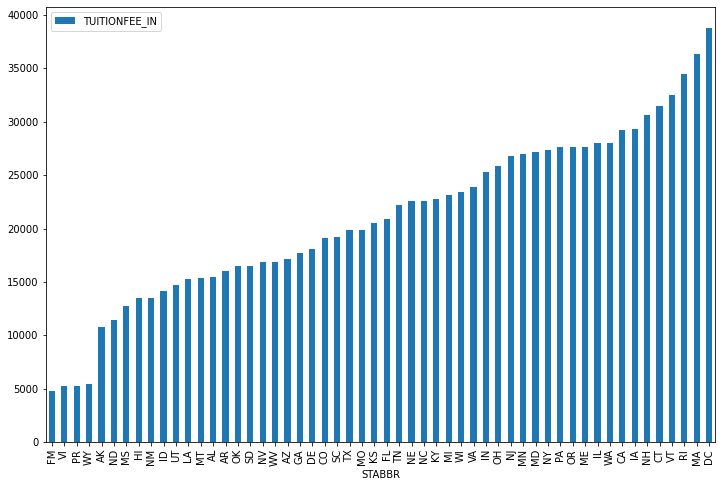

In [14]:
# Rank in-state tution from lowest to highest

pd.options.plotting.backend = "matplotlib"

gb_tuition = gb[["STABBR", "TUITIONFEE_IN"]].sort_values("TUITIONFEE_IN")

gb_tuition.plot.bar(x="STABBR", y="TUITIONFEE_IN",figsize=(12,8))

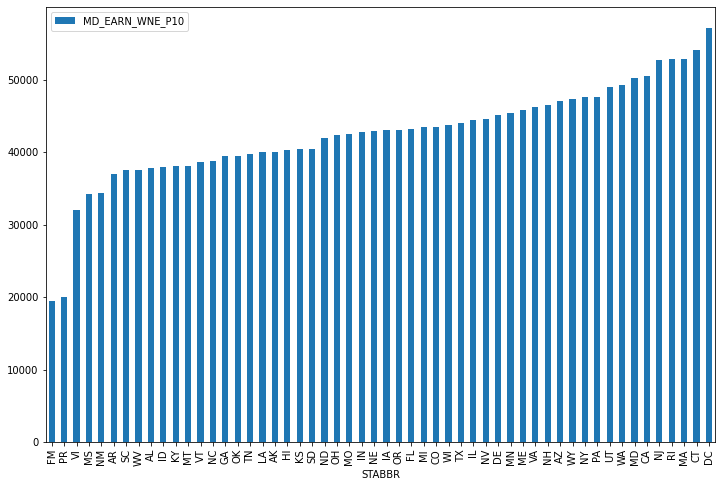

In [15]:

# Rank potential earnings from lowest to highest

gb_earnings = gb[["STABBR", "MD_EARN_WNE_P10"]].sort_values("MD_EARN_WNE_P10")

gb_earnings.plot.bar(x="STABBR", y="MD_EARN_WNE_P10",figsize=(12,8))

### 5.2 - Scatter Plot
We want to find out if there is a relationship between tuition and potential earnings.

Note: This does not work in Google Colab. Need to find a solution. It works in deepnote.com

In [20]:
# Here, we switch the Pandas plotting backend from matplotlib to plot so that
# can explore interactively

pd.options.plotting.backend = "plotly"

gb.plot.scatter(x="TUITIONFEE_IN", y="MD_EARN_WNE_P10",  hover_data=["STABBR"])

ValueError: ignored